### Arima basics

In [1]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from pandas.core import datetools
from pandas import Series, DataFrame

series = read_csv('shampoo-sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)
print(series.head())

Month
2018-01-18    266.0
2018-01-19    145.9
2018-01-20    183.1
2018-01-21    119.3
2018-01-22    180.3
Name: Sales , dtype: float64


C:\Users\Vardan\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  after removing the cwd from sys.path.


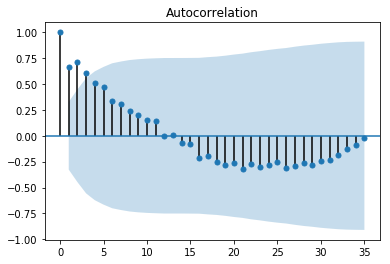

In [2]:
from pandas.tools.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
series = read_csv('shampoo-sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)
plot_acf(series)

In [3]:
# apply differencing
#Start Arima 
from statsmodels.tsa.arima_model import ARIMA

In [4]:
series = read_csv('shampoo-sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)

In [5]:
diff = series.diff(periods=1)
diff.dropna(inplace=True)
diff.head()

Month
2018-01-19   -120.1
2018-01-20     37.2
2018-01-21    -63.8
2018-01-22     61.0
2018-01-23    -11.8
Name: Sales , dtype: float64

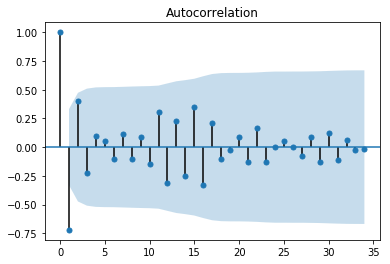

In [6]:
plot_acf(diff)

                             ARIMA Model Results                              
Dep. Variable:               D.Sales    No. Observations:                   35
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -200.011
Method:                       css-mle   S.D. of innovations             72.566
Date:                Wed, 14 Mar 2018   AIC                            406.022
Time:                        13:24:46   BIC                            410.688
Sample:                    01-19-2018   HQIC                           407.633
                         - 02-22-2018                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             11.8299      7.152      1.654      0.108      -2.187      25.847
ar.L1.D.Sales     -0.7364      0.111     -6.605      0.000      -0.955      -0.518
                                    

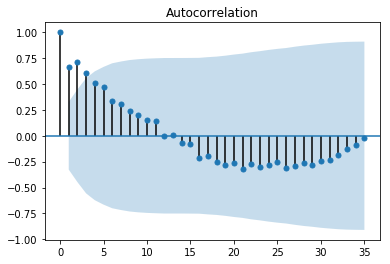

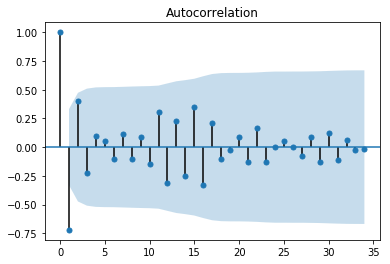

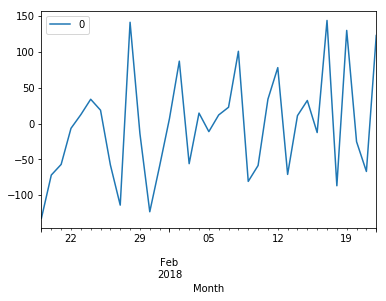

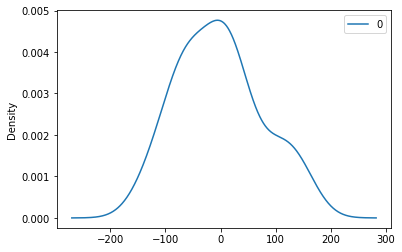

                0
count   35.000000
mean    -2.775892
std     75.434999
min   -131.929923
25%    -58.795741
50%     -6.526363
75%     33.201132
max    144.143384


In [7]:
# fit model
model = ARIMA(series, order=(1,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

predicted=363.496641, expected=342.300000
predicted=315.472118, expected=339.700000
predicted=390.186928, expected=440.400000
predicted=334.199171, expected=315.900000
predicted=393.432178, expected=439.300000
predicted=369.928989, expected=401.300000
predicted=451.510433, expected=437.400000
predicted=388.957308, expected=575.500000
predicted=472.271232, expected=407.600000
predicted=507.257956, expected=682.000000
predicted=471.661047, expected=475.300000
predicted=634.259521, expected=581.300000
predicted=539.786213, expected=646.900000
Test MSE: 6998.942


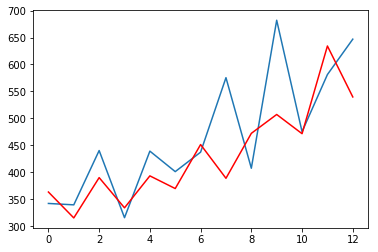

In [35]:
from sklearn.metrics import mean_squared_error

X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(3,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [27]:
# Autocorrelation function (ACF)
from statsmodels.tsa.stattools import acf, pacf

In [30]:
from statsmodels.graphics.tsaplots import plot_acf

In [31]:
acf(series)

array([ 1.        ,  0.66255777,  0.7165448 ,  0.60323689,  0.50618008,
        0.47474817,  0.33604178,  0.3101703 ,  0.23757292,  0.19586055,
        0.1518714 ,  0.13957659, -0.00304812,  0.01174439, -0.06558828,
       -0.07950614, -0.21738274, -0.19666519, -0.24995429, -0.28418939,
       -0.25892599, -0.31978524, -0.2774319 , -0.30531272, -0.28062076,
       -0.25393256, -0.31575358, -0.29668147, -0.25866995, -0.28414567,
       -0.24613791, -0.23602268, -0.18515806, -0.12322057, -0.08790702,
       -0.02006541])

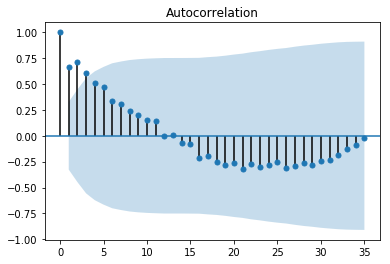

In [32]:
 plot_acf(series)